In [1]:
import requests
import time
import json
arr = []
end_cursor = '' # empty for the 1st page
tag = 'makassar' # your tag
page_count = 100 # desired number of pages
for i in range(0, page_count):
    url = "https://www.instagram.com/explore/tags/{0}/?__a=1&max_id={1}".format(tag, end_cursor)
    r = requests.get(url)
    data = json.loads(r.text)
    
    end_cursor = data['graphql']['hashtag']['edge_hashtag_to_media']['page_info']['end_cursor'] # value for the next page
    edges = data['graphql']['hashtag']['edge_hashtag_to_media']['edges'] # list with posts
    
    for item in edges:
       arr.append(item['node'])
    time.sleep(2) # insurence to not reach a time limit
#print(end_cursor) # save this to restart parsing with the next page
with open('instadataa.json', 'w') as outfile:
    json.dump(arr, outfile) # save to json


In [2]:
import json
import pandas as pd
with open('instadataa.json') as f:
   data = json.load(f)
print(pd.DataFrame(data))

        __typename                              accessibility_caption  \
0       GraphImage                    No photo description available.   
1       GraphImage                    No photo description available.   
2       GraphImage                    No photo description available.   
3     GraphSidecar                    No photo description available.   
4       GraphImage                           Image may contain: shoes   
5     GraphSidecar                    No photo description available.   
6       GraphImage                           Image may contain: shoes   
7     GraphSidecar                 Image may contain: people standing   
8     GraphSidecar                    No photo description available.   
9       GraphImage                           Image may contain: shoes   
10      GraphImage                    No photo description available.   
11    GraphSidecar                 Image may contain: people standing   
12      GraphImage                    No photo desc

In [3]:
import pandas as pd
from pandas.io.json import json_normalize
import datetime as dt

with open('instadataa.json') as f:
   data = json.load(f)
#print(pd.DataFrame(data))
#post_time = dt.fromtimestamp(data['taken_at_timestamp']).strftime('%Y-%m-%d %H:%M:%S')
data2 = pd.DataFrame(data, columns = ['owner','edge_media_to_caption','taken_at_timestamp'])
data2

,owner,edge_media_to_caption,taken_at_timestamp
0,{'id': '1204107843'},{'edges': [{'node': {'text': 'lokasi dan pengi...,1565623855
1,{'id': '3959709913'},{'edges': [{'node': {'text': 'Sweater keren \n...,1565623842
2,{'id': '1204107843'},{'edges': [{'node': {'text': 'lokasi dan pengi...,1565623836
3,{'id': '3959709913'},{'edges': [{'node': {'text': 'Sweater keren \n...,1565623821
4,{'id': '10151727646'},{'edges': [{'node': {'text': 'credit: @celebes...,1565623808
5,{'id': '3959709913'},{'edges': [{'node': {'text': 'Sweater keren \n...,1565623799
6,{'id': '10151727646'},{'edges': [{'node': {'text': 'credit: @celebes...,1565623778
7,{'id': '3959709913'},{'edges': [{'node': {'text': 'Sweater keren \n...,1565623770
8,{'id': '8912087544'},{'edges': [{'node': {'text': '#ready_tww2nd\nJ...,1565623768
9,{'id': '10151727646'},{'edges': [{'node': {'text': 'credit: @celebes...,1565623752


In [15]:
data2['taken_at_timestamp'] = pd.to_datetime(data2['taken_at_timestamp'], unit='s')
data2 = pd.DataFrame(data2, columns = ['taken_at_timestamp'])
data2


,taken_at_timestamp
6143,2019-08-10 00:19:41
4900,2019-08-11 00:29:11
3572,2019-08-08 00:30:23
3571,2019-08-08 00:30:35
2333,2019-08-10 00:34:15
6489,2019-08-12 00:38:03
6488,2019-08-12 00:38:10
6487,2019-08-12 00:39:00
6486,2019-08-12 00:40:09
6485,2019-08-12 00:40:22


In [5]:
    from datetime import datetime as dt
data2['time_only']=data2['taken_at_timestamp'].dt.time
data2['time_only']

0       15:30:55
1       15:30:42
2       15:30:36
3       15:30:21
4       15:30:08
5       15:29:59
6       15:29:38
7       15:29:30
8       15:29:28
9       15:29:12
10      15:29:06
11      15:28:58
12      15:28:54
13      15:28:49
14      15:28:45
15      15:28:40
16      15:28:37
17      15:28:34
18      15:28:28
19      15:28:27
20      15:28:18
21      15:28:00
22      15:27:59
23      15:27:53
24      15:27:32
25      15:27:29
26      15:27:02
27      15:26:36
28      15:26:29
29      15:26:01
          ...   
6461    00:47:01
6462    00:46:45
6463    00:46:33
6464    00:46:14
6465    00:46:06
6466    00:46:02
6467    00:45:57
6468    00:45:52
6469    00:44:30
6470    00:43:57
6471    00:43:42
6472    00:43:31
6473    00:42:57
6474    00:42:47
6475    00:42:47
6476    00:42:33
6477    00:42:19
6478    00:42:09
6479    00:41:59
6480    00:41:07
6481    00:41:07
6482    00:40:52
6483    00:40:50
6484    00:40:43
6485    00:40:22
6486    00:40:09
6487    00:39:00
6488    00:38:

In [6]:
def hr_func(ts):
    return ts.hour
data2['time_hour'] = data2['taken_at_timestamp'].apply(hr_func)
data2['time_hour']


0       15
1       15
2       15
3       15
4       15
5       15
6       15
7       15
8       15
9       15
10      15
11      15
12      15
13      15
14      15
15      15
16      15
17      15
18      15
19      15
20      15
21      15
22      15
23      15
24      15
25      15
26      15
27      15
28      15
29      15
        ..
6461     0
6462     0
6463     0
6464     0
6465     0
6466     0
6467     0
6468     0
6469     0
6470     0
6471     0
6472     0
6473     0
6474     0
6475     0
6476     0
6477     0
6478     0
6479     0
6480     0
6481     0
6482     0
6483     0
6484     0
6485     0
6486     0
6487     0
6488     0
6489     0
6490     7
Name: time_hour, Length: 6491, dtype: int64

In [7]:
data2

,taken_at_timestamp,time_only,time_hour
0,2019-08-12 15:30:55,15:30:55,15
1,2019-08-12 15:30:42,15:30:42,15
2,2019-08-12 15:30:36,15:30:36,15
3,2019-08-12 15:30:21,15:30:21,15
4,2019-08-12 15:30:08,15:30:08,15
5,2019-08-12 15:29:59,15:29:59,15
6,2019-08-12 15:29:38,15:29:38,15
7,2019-08-12 15:29:30,15:29:30,15
8,2019-08-12 15:29:28,15:29:28,15
9,2019-08-12 15:29:12,15:29:12,15


In [8]:
data2.sort_values("time_only", ascending = True, 
                 inplace = True, na_position ='last') 
data2

,taken_at_timestamp,time_only,time_hour
6143,2019-08-10 00:19:41,00:19:41,0
4900,2019-08-11 00:29:11,00:29:11,0
3572,2019-08-08 00:30:23,00:30:23,0
3571,2019-08-08 00:30:35,00:30:35,0
2333,2019-08-10 00:34:15,00:34:15,0
6489,2019-08-12 00:38:03,00:38:03,0
6488,2019-08-12 00:38:10,00:38:10,0
6487,2019-08-12 00:39:00,00:39:00,0
6486,2019-08-12 00:40:09,00:40:09,0
6485,2019-08-12 00:40:22,00:40:22,0


In [9]:
from collections import Counter
x=data2['time_hour']
Counter(x)

Counter({0: 161,
         1: 393,
         2: 554,
         3: 388,
         4: 555,
         5: 472,
         6: 280,
         7: 350,
         8: 419,
         9: 477,
         10: 423,
         11: 496,
         12: 491,
         13: 548,
         14: 285,
         15: 184,
         16: 3,
         18: 3,
         20: 2,
         21: 2,
         22: 4,
         23: 1})

In [10]:
data_freq = Counter(x)
data_freq

Counter({0: 161,
         1: 393,
         2: 554,
         3: 388,
         4: 555,
         5: 472,
         6: 280,
         7: 350,
         8: 419,
         9: 477,
         10: 423,
         11: 496,
         12: 491,
         13: 548,
         14: 285,
         15: 184,
         16: 3,
         18: 3,
         20: 2,
         21: 2,
         22: 4,
         23: 1})

In [20]:
data3 = pd.DataFrame(list(data_freq.items()), columns=['time_hour', 'intensitas'])
data3

,time_hour,intensitas
0,0,161
1,1,393
2,2,554
3,3,388
4,4,555
5,5,472
6,6,280
7,7,350
8,8,419
9,9,477


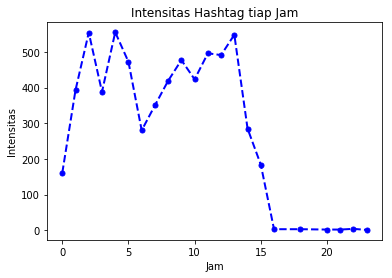

In [22]:
import matplotlib.pyplot as plt
plt.plot(data3['time_hour'],data3['intensitas'],  color='blue', marker='o', linestyle='dashed',linewidth=2, markersize=5)

plt.title('Intensitas Hashtag tiap Jam')
plt.xlabel('Jam')
plt.ylabel('Intensitas')
plt.show()
